In [1]:
cd ../

/users/k1926552/Documents


In [2]:
cd NetPyNE/

/users/k1926552/Documents/NetPyNE


In [3]:
ls

Allen Cells & Mechs.ipynb      M1NetworkModel/           Untitled.ipynb
Loading the PFC network.ipynb  Motor Cortex Model.ipynb


In [4]:
#!git clone https://github.com/OpenSourceBrain/M1NetworkModel

Cloning into 'M1NetworkModel'...
remote: Enumerating objects: 571, done.
remote: Total 571 (delta 0), reused 0 (delta 0), pack-reused 571
Receiving objects: 100% (571/571), 16.49 MiB | 13.96 MiB/s, done.
Resolving deltas: 100% (247/247), done.


In [4]:
cd M1NetworkModel/

/users/k1926552/Documents/NetPyNE/M1NetworkModel


In [5]:
ls

CITATION.md              M1_25percent.net.nml.h5  math
compile*                 M1_5percent.net.nml      raster.png
izhi2007b.mod            M1_export.py             README.md
LEMS_M1_5percent.xml     M1.py*                   runsim*
LICENSE                  M1_run.py                sys
M1                       M1_test.py*              x86_64/
M1_10percent.net.nml.h5  M1_ynorm_izhi_shape.png


In [27]:
#!./compile

Compiling...
/users/k1926552/Documents/NetPyNE/M1NetworkModel
Mod files: "./izhi2007b.mod"

Creating x86_64 directory for .o files.

COBJS=''
 -> Compiling mod_func.c
gcc -O2   -I.   -I/users/k1926552/.local/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 -> NMODL ../izhi2007b.mod
(cd ".."; MODLUNIT=/users/k1926552/.local/lib/python3.7/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib /users/k1926552/.local/lib/python3.7/site-packages/neuron/.data/bin/nocmodl izhi2007b.mod -o "/users/k1926552/Documents/NetPyNE/M1NetworkModel/x86_64")
Translating izhi2007b.mod into /users/k1926552/Documents/NetPyNE/M1NetworkModel/x86_64/izhi2007b.c
Notice: VERBATIM blocks are not thread safe
 -> Compiling izhi2007b.c
gcc -O2   -I".." -I.   -I/users/k1926552/.local/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c izhi2007b.c -o izhi2007b.o
 => LINKING shared library ./libnrnmech.so
g++ -O2 -DVERSION

In [7]:

from netpyne import specs,sim
import math

In [8]:

netParams = specs.NetParams()   # object of class NetParams to store the network parameters
simConfig = specs.SimConfig()   # object of class SimConfig to store the simulation configuration

In [9]:

# Simulation parameters
simConfig.duration = 1.0*1e4 # Duration of the simulation, in ms
simConfig.dt = 0.05 # Internal integration timestep to use
simConfig.seeds = {'conn': 1, 'stim': 1, 'loc': 1} # Seeds for randomizers (connectivity, input stimulation and cell locations)
simConfig.createNEURONObj = 1  # create HOC objects when instantiating network
simConfig.createPyStruct = 1  # create Python structure (simulator-independent) when instantiating network
simConfig.verbose = 0 # Whether to write diagnostic information on events 


# Recording 
simConfig.recordCells = []  # list of cells to record from 
simConfig.recordTraces = {'V':{'sec':'soma','loc':0.5,'var':'v'}} # 'V':{'sec':'soma','loc':0.5,'var':'v'}}
    #'V':{'sec':'soma','loc':0.5,'var':'v'}, 
    #'u':{'sec':'soma', 'pointp':'Izhi2007b_0', 'var':'u'}, 
    #'I':{'sec':'soma', 'pointp':'Izhi2007b_0', 'var':'i'}, 
    #'AMPA_i': {'sec':'soma', 'loc':'0.5', 'synMech':'AMPA', 'var':'i'},
    #'NMDA_i': {'sec':'soma', 'loc':'0.5', 'synMech':'NMDA', 'var':'iNMDA'}}  # Dict of traces to record
simConfig.recordStim = False  # record spikes of cell stims
simConfig.recordStep = 0.1 # Step size in ms to save data (eg. V traces, LFP, etc)

# Saving
simConfig.filename = 'M1_ynorm_izhi'  # Set file output name
simConfig.saveFileStep = 1000 # step size in ms to save data to disk
simConfig.savePickle = False # save to pickle file
simConfig.saveJson = False # save to json file
simConfig.saveMat = False # save to mat file
simConfig.saveTxt = False # save to txt file
simConfig.saveDpk = False # save to .dpk pickled file
simConfig.saveHDF5 = False # save to HDF5 file 


# Analysis and plotting 
simConfig.analysis['plotRaster'] = {'orderInverse': True, 'figSize': (12,10), 'lw': 0.3,'markerSize':6, 'marker': '.', 'dpi': 300, 'saveFig': 'raster.png'} # Whether or not to plot a raster
simConfig.analysis['plotTraces'] = {'include': [('IT_L23',10),('IT_L5A',10), ('PT_L5B',10), ('PV_L23',5)]} # plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = {'showConns': False}


In [10]:

# General network parameters
netParams.scale = 1 # Scale factor for number of cells
netParams.sizeX = 300*math.sqrt(netParams.scale) # x-dimension (horizontal length) size in um
netParams.sizeY = 1350 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 300*math.sqrt(netParams.scale) # z-dimension (horizontal depth) size in um

## General connectivity parameters
netParams.scaleConnWeight = 0.0003 # Connection weight scale factor
netParams.scaleConnWeightNetStims = 0.25 # Connection weight scale factor for NetStims
netParams.defaultDelay = 2.0 # default conn delay (ms)
netParams.propVelocity = 100.0 # propagation velocity (um/ms)
netParams.probLambda = 100.0  # length constant (lambda) for connection probability decay (um)

In [11]:
## create list of populations, where each item contains a dict with the pop params     
netParams.popParams['IT_L23'] = {'cellModel': 'Izhi', 'cellType': 'IT',  'ynormRange': [0.12, 0.31], 'density': 80e2} #  L2/3 IT
netParams.popParams['IT_L4'] =  {'cellModel': 'Izhi', 'cellType': 'IT',  'ynormRange': [0.31, 0.41], 'density': 80e2} #  L4 IT
netParams.popParams['IT_L5A'] = {'cellModel': 'Izhi', 'cellType': 'IT',  'ynormRange': [0.41, 0.52], 'density': 80e2} #  L5A IT
netParams.popParams['IT_L5B'] = {'cellModel': 'Izhi', 'cellType': 'IT',  'ynormRange': [0.52, 0.77], 'density': 40e2} #  L5B IT
netParams.popParams['PT_L5B'] = {'cellModel': 'Izhi', 'cellType': 'PT',  'ynormRange': [0.52, 0.77], 'density': 40e2} #  L5B PT
netParams.popParams['IT_L6'] =  {'cellModel': 'Izhi', 'cellType': 'IT',  'ynormRange': [0.77, 1.0], 'density': 40e2} #  L6 IT
netParams.popParams['CT_L6'] =  {'cellModel': 'Izhi', 'cellType': 'CT',  'ynormRange': [0.77, 1.0], 'density': 40e2} #  L6 CT
netParams.popParams['PV_L23'] = {'cellModel': 'Izhi', 'cellType': 'PV',  'ynormRange': [0.1, 0.31], 'density': 10e2} #  L2/3 PV (FS)
netParams.popParams['SOM_L23'] ={'cellModel': 'Izhi', 'cellType': 'SOM', 'ynormRange': [0.1, 0.31], 'density': 10e2} #  L2/3 SOM (LTS)
netParams.popParams['PV_L5'] =  {'cellModel': 'Izhi', 'cellType': 'PV',  'ynormRange': [0.31, 0.77], 'density': 10e2} #  L5 PV (FS)
netParams.popParams['SOM_L5'] = {'cellModel': 'Izhi', 'cellType': 'SOM', 'ynormRange': [0.31, 0.77], 'density': 10e2} #  L5 SOM (LTS)
netParams.popParams['PV_L6'] =  {'cellModel': 'Izhi', 'cellType': 'PV',  'ynormRange': [0.77, 1.0], 'density': 10e2} #  L6 PV (FS)
netParams.popParams['SOM_L6'] = {'cellModel': 'Izhi', 'cellType': 'SOM', 'ynormRange': [0.77, 1.0], 'density': 10e2} #  L6 SOM (LTS)

In [12]:
## Izhi cell params (used in cell properties)
izhiParams = {}
izhiParams['RS'] = {'mod':'Izhi2007b', 'C':1, 'k':0.7, 'vr':-60, 'vt':-40, 'vpeak':35, 'a':0.03, 'b':-2, 'c':-50, 'd':100, 'celltype':1}
izhiParams['IB'] = {'mod':'Izhi2007b', 'C':1.5, 'k':1.2, 'vr':-75, 'vt':-45, 'vpeak':50, 'a':0.01, 'b':5, 'c':-56, 'd':130, 'celltype':2}
izhiParams['LTS'] = {'mod':'Izhi2007b', 'C':1.0, 'k':1.0, 'vr':-56, 'vt':-42, 'vpeak':40, 'a':0.03, 'b':8, 'c':-53, 'd':20, 'celltype':4}
izhiParams['FS'] = {'mod':'Izhi2007b', 'C':0.2, 'k':1.0, 'vr':-55, 'vt':-40, 'vpeak':25, 'a':0.2, 'b':-2, 'c':-45, 'd':-55, 'celltype':5}


## IT cell params
cellRule = {'conds': {'cellType': 'IT'}, 'secs': {}}
cellRule['secs']['soma'] = {'geom': {}, 'pointps':{}}  #  soma
cellRule['secs']['soma']['geom'] = {'diam': 10, 'L': 10, 'cm': 31.831}
cellRule['secs']['soma']['pointps']['Izhi'] = izhiParams['RS'] 
netParams.cellParams['IT'] = cellRule  # add dict to list of cell properties

## PT cell params
cellRule = {'conds': {'cellType': 'PT'}, 'secs': {}}
cellRule['secs']['soma'] = {'geom': {}, 'pointps':{}}  #  soma
cellRule['secs']['soma']['geom'] = {'diam': 10, 'L': 10, 'cm': 31.831}
cellRule['secs']['soma']['pointps']['Izhi'] = izhiParams['IB'] 
netParams.cellParams['PT'] = cellRule  # add dict to list of cell properties

## CT cell params
cellRule = {'conds': {'cellType': 'CT'}, 'secs': {}}
cellRule['secs']['soma'] = {'geom': {}, 'pointps':{}}  #  soma
cellRule['secs']['soma']['geom'] = {'diam': 10, 'L': 10, 'cm': 31.831}
cellRule['secs']['soma']['pointps']['Izhi'] = izhiParams['RS'] 
netParams.cellParams['CT'] = cellRule  # add dict to list of cell properties

## SOM cell params
cellRule = { 'conds': {'cellType': 'SOM'}, 'secs': {}}
cellRule['secs']['soma'] = {'geom': {}, 'pointps':{}}  #  soma
cellRule['secs']['soma']['geom'] = {'diam': 10, 'L': 10, 'cm': 31.831}
cellRule['secs']['soma']['pointps']['Izhi'] = izhiParams['LTS'] 
netParams.cellParams['SOM'] = cellRule  # add dict to list of cell properties 

## PV cell params
cellRule = {'conds': {'cellType': 'PV'}, 'secs': {}}
cellRule['secs']['soma'] = {'geom': {}, 'pointps':{}}  #  soma
cellRule['secs']['soma']['geom'] = {'diam': 10, 'L': 10, 'cm': 31.831}
cellRule['secs']['soma']['pointps']['Izhi'] = izhiParams['FS'] 
netParams.cellParams['PV'] = cellRule  # add dict to list of cell properties

In [13]:

# Synaptic mechanism parameters
netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 0.05, 'tau2': 2.3, 'e': 0}  # AMPA
netParams.synMechParams['NMDA'] = {'mod': 'Exp2Syn', 'tau1': 0.15, 'tau2': 15, 'e': 0}  # NMDA
netParams.synMechParams['GABAA'] = {'mod': 'Exp2Syn', 'tau1': 0.07, 'tau2': 9.1, 'e': -80}  # GABAA
netParams.synMechParams['GABAB'] = {'mod': 'Exp2Syn', 'tau1': 0.07, 'tau2': 9.1, 'e': -80}  # GABAB


In [14]:

# Stimulation parameters
netParams.stimSourceParams['background_E']  = {'type': 'NetStim', 'rate': 10, 'noise': 1.0} # background inputs to Exc
netParams.stimSourceParams['background_I']  = {'type': 'NetStim', 'rate': 10, 'noise': 1.0} # background inputs to Inh

netParams.stimTargetParams['bgE->IT,CT'] = {'source': 'background_E', 'conds': {'cellType': ['IT','CT']}, 
                                            'synMech': 'AMPA', 'weight': 0.1, 'delay': '2+normal(5,3)'}  
netParams.stimTargetParams['bgE->PT'] = {'source': 'background_E', 'conds': {'cellType': ['PT']}, 
                                            'synMech': 'AMPA', 'weight': 0.15, 'delay': '2+normal(5,3)'}  
netParams.stimTargetParams['bgI->PV'] = {'source': 'background_E', 'conds': {'cellType': ['PV']}, 
                                            'synMech': 'AMPA', 'weight': 0.05, 'delay': '2+normal(5,3)'}  
netParams.stimTargetParams['bgI->SOM'] = {'source': 'background_E', 'conds': {'cellType': ['SOM']}, 
                                            'synMech': 'AMPA', 'weight': 0.03, 'delay': '2+normal(5,3)'}  

# List of connectivity rules/params
netParams.ItoIweight = 0.5

# Generated using importConnFromExcel() function in params/utils.py 
netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.1,0.2]},
'postConds': {'cellType': 'IT', 'ynorm': [0.1,0.2]},
'synMech': 'AMPA',
'probability': 0.09263,
'weight': 0.64,
'delay': 'defaultDelay+dist_3D/propVelocity'})


netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.1,0.2]},
'postConds': {'cellType': 'IT', 'ynorm': [0.2,0.3]},
'synMech': 'AMPA',
'probability': 0.05354,
'weight': 0.44,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.1,0.2]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3,0.4]},
'synMech': 'AMPA',
'probability': 0.15907,
'weight': 0.31,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.2,0.3]},
'postConds': {'cellType': 'IT', 'ynorm': [0.1,0.2]},
'synMech': 'AMPA',
'probability': 0.02652,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.2,0.3]},
'postConds': {'cellType': 'IT', 'ynorm': [0.2,0.3]},
'synMech': 'AMPA',
'probability': 0.18713,
'weight': 0.78,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.2,0.3]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3,0.4]},
'synMech': 'AMPA',
'probability': 0.05749,
'weight': 0.36,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.3,0.4]},
'postConds': {'cellType': 'IT', 'ynorm': [0.1,0.2]},
'synMech': 'AMPA',
'probability': 0.02757,
'weight': 0.98,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.3,0.4]},
'postConds': {'cellType': 'IT', 'ynorm': [0.2,0.3]},
'synMech': 'AMPA',
'probability': 0.06036,
'weight': 0.58,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.3,0.4]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3,0.4]},
'synMech': 'AMPA',
'probability': 0.24283,
'weight': 0.95,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.3,0.4]},
'postConds': {'cellType': ['IT','CT'], 'ynorm': [0.8,0.9]},
'synMech': 'AMPA',
'probability': 0.00112,
'weight': 2.27,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.4,0.5]},
'postConds': {'cellType': 'IT', 'ynorm': [0.1,0.2]},
'synMech': 'AMPA',
'probability': 0.05249,
'weight': 0.52,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.4,0.5]},
'postConds': {'cellType': 'IT', 'ynorm': [0.2,0.3]},
'synMech': 'AMPA',
'probability': 0.02253,
'weight': 0.67,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.4,0.5]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3,0.4]},
'synMech': 'AMPA',
'probability': 0.02279,
'weight': 0.48,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.4,0.5]},
'postConds': {'cellType': ['IT','CT'], 'ynorm': [0.8,0.9]},
'synMech': 'AMPA',
'probability': 0.02354,
'weight': 0.28,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.4,0.5]},
'postConds': {'cellType': ['IT','CT'], 'ynorm': [0.9,1.0]},
'synMech': 'AMPA',
'probability': 0.0045,
'weight': 0.28,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.5,0.6]},
'postConds': {'cellType': 'IT', 'ynorm': [0.1,0.2]},
'synMech': 'AMPA',
'probability': 0.03723,
'weight': 0.21,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.5,0.6]},
'postConds': {'cellType': 'IT', 'ynorm': [0.2,0.3]},
'synMech': 'AMPA',
'probability': 0.03549,
'weight': 0.26,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.5,0.6]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3,0.4]},
'synMech': 'AMPA',
'probability': 0.04656,
'weight': 0.17,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.5,0.6]},
'postConds': {'cellType': ['IT','CT'], 'ynorm': [0.8,0.9]},
'synMech': 'AMPA',
'probability': 0.01985,
'weight': 0.49,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.5,0.6]},
'postConds': {'cellType': ['IT','CT'], 'ynorm': [0.9,1.0]},
'synMech': 'AMPA',
'probability': 0.0041,
'weight': 0.49,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.6,0.7]},
'postConds': {'cellType': 'IT', 'ynorm': [0.1,0.2]},
'synMech': 'AMPA',
'probability': 0.0023,
'weight': 0.21,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.6,0.7]},
'postConds': {'cellType': 'IT', 'ynorm': [0.2,0.3]},
'synMech': 'AMPA',
'probability': 0.0164,
'weight': 0.26,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.6,0.7]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3,0.4]},
'synMech': 'AMPA',
'probability': 0.01887,
'weight': 0.17,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.6,0.7]},
'postConds': {'cellType': ['IT','CT'], 'ynorm': [0.8,0.9]},
'synMech': 'AMPA',
'probability': 0.02843,
'weight': 0.49,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.6,0.7]},
'postConds': {'cellType': ['IT','CT'], 'ynorm': [0.9,1.0]},
'synMech': 'AMPA',
'probability': 0.00608,
'weight': 0.49,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.7,0.8]},
'postConds': {'cellType': 'IT', 'ynorm': [0.2,0.3]},
'synMech': 'AMPA',
'probability': 0.00248,
'weight': 0.26,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.7,0.8]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3,0.4]},
'synMech': 'AMPA',
'probability': 0.02445,
'weight': 0.17,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.7,0.8]},
'postConds': {'cellType': ['IT','CT'], 'ynorm': [0.8,0.9]},
'synMech': 'AMPA',
'probability': 0.02534,
'weight': 0.49,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.7,0.8]},
'postConds': {'cellType': ['IT','CT'], 'ynorm': [0.9,1.0]},
'synMech': 'AMPA',
'probability': 0.01239,
'weight': 0.49,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.8,0.9]},
'postConds': {'cellType': ['IT','CT'], 'ynorm': [0.8,0.9]},
'synMech': 'AMPA',
'probability': 0.0282,
'weight': 0.53,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.8,0.9]},
'postConds': {'cellType': ['IT','CT'], 'ynorm': [0.9,1.0]},
'synMech': 'AMPA',
'probability': 0.01523,
'weight': 0.53,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.9,1.0]},
'postConds': {'cellType': ['IT','CT'], 'ynorm': [0.8,0.9]},
'synMech': 'AMPA',
'probability': 0.02209,
'weight': 0.53,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.9,1.0]},
'postConds': {'cellType': ['IT','CT'], 'ynorm': [0.9,1.0]},
'synMech': 'AMPA',
'probability': 0.0282,
'weight': 0.53,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0,0.0625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3125,0.375]},
'synMech': 'AMPA',
'probability': 0.01552,
'weight': 0.31,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0,0.0625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.00752,
'weight': 0.43,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0,0.0625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.00313,
'weight': 0.55,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0,0.0625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.00161,
'weight': 0.55,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0,0.0625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.00162,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0,0.0625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.00566,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0,0.0625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.00283,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.0625,0.125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3125,0.375]},
'synMech': 'AMPA',
'probability': 0.01825,
'weight': 0.31,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.0625,0.125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.02673,
'weight': 0.43,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.0625,0.125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.01177,
'weight': 0.55,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.0625,0.125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.00447,
'weight': 0.55,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.0625,0.125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.01216,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.0625,0.125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.01007,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.0625,0.125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.00672,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.125,0.1875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3125,0.375]},
'synMech': 'AMPA',
'probability': 0.0199,
'weight': 0.31,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.125,0.1875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.25242,
'weight': 0.43,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.125,0.1875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.10856,
'weight': 0.55,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.125,0.1875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.01429,
'weight': 0.55,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.125,0.1875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.0429,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.125,0.1875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.0403,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.125,0.1875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.01982,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.1875,0.25]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3125,0.375]},
'synMech': 'AMPA',
'probability': 0.02528,
'weight': 0.36,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.1875,0.25]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.07305,
'weight': 0.645,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.1875,0.25]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.03289,
'weight': 0.93,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.1875,0.25]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.01182,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.1875,0.25]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.01017,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.1875,0.25]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.00814,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.1875,0.25]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.00615,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.25,0.3125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3125,0.375]},
'synMech': 'AMPA',
'probability': 0.03508,
'weight': 0.36,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.25,0.3125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.02558,
'weight': 0.645,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.25,0.3125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.0212,
'weight': 0.93,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.25,0.3125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.01126,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.25,0.3125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.01244,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.25,0.3125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.01172,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.25,0.3125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.00771,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.3125,0.375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3125,0.375]},
'synMech': 'AMPA',
'probability': 0.24283,
'weight': 0.95,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.3125,0.375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.02792,
'weight': 0.745,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.3125,0.375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.02731,
'weight': 0.54,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.3125,0.375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.01384,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.3125,0.375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.01409,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.3125,0.375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.02068,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.3125,0.375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.01678,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.375,0.4375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3125,0.375]},
'synMech': 'AMPA',
'probability': 0.01015,
'weight': 0.715,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.375,0.4375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.27108,
'weight': 0.6575,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.375,0.4375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.02483,
'weight': 0.6,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.375,0.4375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.01865,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.375,0.4375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.01966,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.375,0.4375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.02269,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.4375,0.5]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.0367,
'weight': 0.57,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.4375,0.5]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.19058,
'weight': 0.66,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.4375,0.5]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.01417,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.4375,0.5]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.01148,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.4375,0.5]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.00896,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.4375,0.5]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.01049,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5,0.5625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3125,0.375]},
'synMech': 'AMPA',
'probability': 0.00516,
'weight': 0.17,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5,0.5625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.06083,
'weight': 0.205,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5,0.5625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.05276,
'weight': 0.24,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5,0.5625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.07207,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5,0.5625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.01464,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5,0.5625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.02666,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5,0.5625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.0189,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5625,0.625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3125,0.375]},
'synMech': 'AMPA',
'probability': 0.02669,
'weight': 0.17,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5625,0.625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.05569,
'weight': 0.205,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5625,0.625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.04304,
'weight': 0.24,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5625,0.625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.01716,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5625,0.625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.07207,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5625,0.625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.02512,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5625,0.625]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.03215,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.625,0.6875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3125,0.375]},
'synMech': 'AMPA',
'probability': 0.012,
'weight': 0.17,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.625,0.6875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.05577,
'weight': 0.205,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.625,0.6875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.04895,
'weight': 0.24,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.625,0.6875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.02604,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.625,0.6875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.02285,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.625,0.6875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.07207,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.625,0.6875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.03437,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.6875,0.75]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3125,0.375]},
'synMech': 'AMPA',
'probability': 0.01128,
'weight': 0.17,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.6875,0.75]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.03357,
'weight': 0.205,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.6875,0.75]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.05406,
'weight': 0.24,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.6875,0.75]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.03109,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.6875,0.75]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.02212,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.6875,0.75]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.03198,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.6875,0.75]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.07207,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.3125,0.375]},
'synMech': 'AMPA',
'probability': 0.02865,
'weight': 0.085,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.03087,
'weight': 0.1225,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.02845,
'weight': 0.16,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.02626,
'weight': 0.505,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.03999,
'weight': 0.505,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.03449,
'weight': 0.505,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.03762,
'weight': 0.505,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'IT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.06514,
'weight': 0.5075,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.8125,0.875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.10538,
'weight': 0.04,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.8125,0.875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.05033,
'weight': 0.08,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.8125,0.875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.0371,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.8125,0.875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.04348,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.8125,0.875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.07874,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.8125,0.875]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.02447,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.875,0.9375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.03777,
'weight': 0.04,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.875,0.9375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.03426,
'weight': 0.08,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.875,0.9375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.00944,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.875,0.9375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.01732,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.875,0.9375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.03038,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.875,0.9375]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.03983,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.9375,1.0]},
'postConds': {'cellType': 'IT', 'ynorm': [0.375,0.4375]},
'synMech': 'AMPA',
'probability': 0.01306,
'weight': 0.04,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.9375,1.0]},
'postConds': {'cellType': 'IT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.0208,
'weight': 0.08,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.9375,1.0]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.00606,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.9375,1.0]},
'postConds': {'cellType': 'IT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.01059,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.9375,1.0]},
'postConds': {'cellType': 'IT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.01826,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.9375,1.0]},
'postConds': {'cellType': 'IT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.02623,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0,0.0625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 7e-05,
'weight': 0.55,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0,0.0625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.00152,
'weight': 0.55,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0,0.0625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.00175,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0,0.0625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.00834,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0,0.0625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.00121,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0,0.0625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.0151,
'weight': 0.11,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.0625,0.125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.00834,
'weight': 0.55,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.0625,0.125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.03265,
'weight': 0.55,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.0625,0.125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.0344,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.0625,0.125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.05135,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.0625,0.125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.02531,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.125,0.1875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.15193,
'weight': 0.55,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.125,0.1875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.19617,
'weight': 0.55,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.125,0.1875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.32257,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.125,0.1875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.11603,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.125,0.1875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.04989,
'weight': 0.22,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.125,0.1875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.03963,
'weight': 0.11,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.1875,0.25]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.11919,
'weight': 0.93,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.1875,0.25]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.12195,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.1875,0.25]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.06862,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.1875,0.25]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.01836,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.1875,0.25]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.01323,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.25,0.3125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.06539,
'weight': 0.93,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.25,0.3125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.06917,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.25,0.3125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.03868,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.25,0.3125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.00778,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.25,0.3125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.00557,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.25,0.3125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.00954,
'weight': 0.505,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.3125,0.375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.03477,
'weight': 0.54,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.3125,0.375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.03161,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.3125,0.375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.01466,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.3125,0.375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.00559,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.3125,0.375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.00364,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.3125,0.375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.0032,
'weight': 1.575,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.375,0.4375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.012,
'weight': 0.6,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.375,0.4375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.02515,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.375,0.4375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.01581,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.375,0.4375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.0112,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.375,0.4375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.00632,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.375,0.4375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.00845,
'weight': 1.0775,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.4375,0.5]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.19058,
'weight': 0.66,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.4375,0.5]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.01695,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.4375,0.5]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.02083,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.4375,0.5]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.01875,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.4375,0.5]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.01068,
'weight': 0.88,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.4375,0.5]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.02621,
'weight': 0.58,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5,0.5625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.06517,
'weight': 0.24,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5,0.5625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.07207,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5,0.5625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.02806,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5,0.5625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.02714,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5,0.5625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.02555,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5,0.5625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.04785,
'weight': 0.6,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5625,0.625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.06122,
'weight': 0.24,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5625,0.625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.02694,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5625,0.625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.07207,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5625,0.625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.04268,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5625,0.625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.03144,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.5625,0.625]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.06465,
'weight': 0.6,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.625,0.6875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.05847,
'weight': 0.24,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.625,0.6875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.03243,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.625,0.6875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.02506,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.625,0.6875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.07207,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.625,0.6875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.04815,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.625,0.6875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.05065,
'weight': 0.6,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.6875,0.75]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.11183,
'weight': 0.24,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.6875,0.75]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.04361,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.6875,0.75]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.03592,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.6875,0.75]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.03573,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.6875,0.75]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.07207,
'weight': 0.71,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.6875,0.75]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.03327,
'weight': 0.6,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.0287,
'weight': 0.16,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.03114,
'weight': 0.505,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.04704,
'weight': 0.505,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.064,
'weight': 0.505,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.04217,
'weight': 0.505,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.75,0.8125]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.10083,
'weight': 0.5075,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.8125,0.875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.0842,
'weight': 0.08,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.8125,0.875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.02139,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.8125,0.875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.04168,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.8125,0.875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.0791,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.8125,0.875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.05949,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.8125,0.875]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.06274,
'weight': 0.415,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.875,0.9375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.01194,
'weight': 0.08,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.875,0.9375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.01487,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.875,0.9375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.01159,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.875,0.9375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.01603,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.875,0.9375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.02624,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.875,0.9375]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.02597,
'weight': 0.415,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.9375,1.0]},
'postConds': {'cellType': 'PT', 'ynorm': [0.4375,0.5]},
'synMech': 'AMPA',
'probability': 0.03389,
'weight': 0.08,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.9375,1.0]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5,0.5625]},
'synMech': 'AMPA',
'probability': 0.00614,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.9375,1.0]},
'postConds': {'cellType': 'PT', 'ynorm': [0.5625,0.625]},
'synMech': 'AMPA',
'probability': 0.0087,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.9375,1.0]},
'postConds': {'cellType': 'PT', 'ynorm': [0.625,0.6875]},
'synMech': 'AMPA',
'probability': 0.01269,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.9375,1.0]},
'postConds': {'cellType': 'PT', 'ynorm': [0.6875,0.75]},
'synMech': 'AMPA',
'probability': 0.0154,
'weight': 0.3,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'cellType': ['IT','PT','CT'], 'ynorm': [0.9375,1.0]},
'postConds': {'cellType': 'PT', 'ynorm': [0.75,0.8125]},
'synMech': 'AMPA',
'probability': 0.01161,
'weight': 0.415,
'delay': 'defaultDelay+dist_3D/propVelocity'})


netParams.addConnParams(None, {'preConds': {'pop': 'IT_L23'},
'postConds': {'pop': 'SOM_L23'},
'synMech': 'AMPA',
'probability': 0.18713,
'weight': 0.78,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': 'IT_L23'},
'postConds': {'pop': 'SOM_L5'},
'synMech': 'AMPA',
'probability': 0.21712,
'weight': 1.01,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': ['IT_L4','IT_L5A','IT_L5B','PT_L5B']},
'postConds': {'pop': 'SOM_L23'},
'synMech': 'AMPA',
'probability': 0.02222,
'weight': 0.3625,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': ['IT_L4','IT_L5A','IT_L5B','PT_L5B']},
'postConds': {'pop': 'SOM_L5'},
'synMech': 'AMPA',
'probability': 0.03494,
'weight': 0.1225,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': ['IT_L4','IT_L5A','IT_L5B','PT_L5B']},
'postConds': {'pop': 'SOM_L6'},
'synMech': 'AMPA',
'probability': 0.01553,
'weight': 0.4375,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': ['IT_L6','CT_L6']},
'postConds': {'pop': 'SOM_L5'},
'synMech': 'AMPA',
'probability': 0.02485,
'weight': 0.24786,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': ['IT_L6','CT_L6']},
'postConds': {'pop': 'SOM_L6'},
'synMech': 'AMPA',
'probability': 0.02343,
'weight': 0.53,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': 'IT_L23'},
'postConds': {'pop': 'PV_L23'},
'synMech': 'AMPA',
'probability': 0.18713,
'weight': 0.78,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': 'IT_L23'},
'postConds': {'pop': 'PV_L5'},
'synMech': 'AMPA',
'probability': 0.01996,
'weight': 0.11,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': ['IT_L4','IT_L5A','IT_L5B','PT_L5B']},
'postConds': {'pop': 'PV_L23'},
'synMech': 'AMPA',
'probability': 0.02222,
'weight': 0.3625,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': ['IT_L4','IT_L5A','IT_L5B','PT_L5B']},
'postConds': {'pop': 'PV_L5'},
'synMech': 'AMPA',
'probability': 0.19058,
'weight': 1.0775,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': ['IT_L4','IT_L5A','IT_L5B','PT_L5B']},
'postConds': {'pop': 'PV_L6'},
'synMech': 'AMPA',
'probability': 0.01553,
'weight': 0.4375,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': ['IT_L6','CT_L6']},
'postConds': {'pop': 'PV_L5'},
'synMech': 'AMPA',
'probability': 0.02485,
'weight': 0.24786,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': ['IT_L6','CT_L6']},
'postConds': {'pop': 'PV_L6'},
'synMech': 'AMPA',
'probability': 0.02343,
'weight': 0.53,
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': 'SOM_L23'},
'postConds': {'ynorm': [0.12,0.31]},
'synMech': 'GABAB',
'probability': '1.0 * exp(-dist_3D/probLambda)',
'weight': 'ItoIweight',
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': 'SOM_L5'},
'postConds': {'ynorm': [0.31,0.77]},
'synMech': 'GABAB',
'probability': '1.0 * exp(-dist_3D/probLambda)',
'weight': 'ItoIweight',
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': 'SOM_L6'},
'postConds': {'ynorm': [0.77,1.0]},
'synMech': 'GABAB',
'probability': '1.0 * exp(-dist_3D/probLambda)',
'weight': 'ItoIweight',
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': 'PV_L23'},
'postConds': {'ynorm': [0.12,0.31]},
'synMech': 'GABAA',
'probability': '1.0 * exp(-dist_3D/probLambda)',
'weight': 'ItoIweight',
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': 'PV_L5'},
'postConds': {'ynorm': [0.31,0.77]},
'synMech': 'GABAA',
'probability': '1.0 * exp(-dist_3D/probLambda)',
'weight': 'ItoIweight',
'delay': 'defaultDelay+dist_3D/propVelocity'})

netParams.addConnParams(None, {'preConds': {'pop': 'PV_L6'},
'postConds': {'ynorm': [0.77,1.0]},
'synMech': 'GABAA',
'probability': '1.0 * exp(-dist_3D/probLambda)',
'weight': 'ItoIweight',
'delay': 'defaultDelay+dist_3D/propVelocity'})



# Dictionary of annotations
netParams.annots = {}




Start time:  2021-05-25 17:11:37.992689

Creating network of 13 cell populations on 1 hosts...
  Number of cells on node 0: 1065 
  Done; cell creation time = 0.16 s.
Making connections...
  Number of connections on node 0: 48688 
  Number of synaptic contacts on node 0: 49100 
  Done; cell connection time = 7.00 s.
Adding stims...
  Number of stims on node 0: 1065 
  Done; cell stims creation time = 0.10 s.
Recording 4 traces of 1 types on node 0

Running simulation for 10000.0 ms...
  Done; run time = 579.48 s; real-time ratio: 0.02.

Gathering data...
  Done; gather time = 1.62 s.

Analyzing...
  Cells: 1065
  Connections: 49753 (46.72 per cell)
  Synaptic contacts: 50165 (47.10 per cell)
  Spikes: 74331 (6.98 Hz)
  Simulated time: 10.0 s; 1 workers
  Run time: 579.48 s
  Done; saving time = 0.05 s.
Plotting raster...


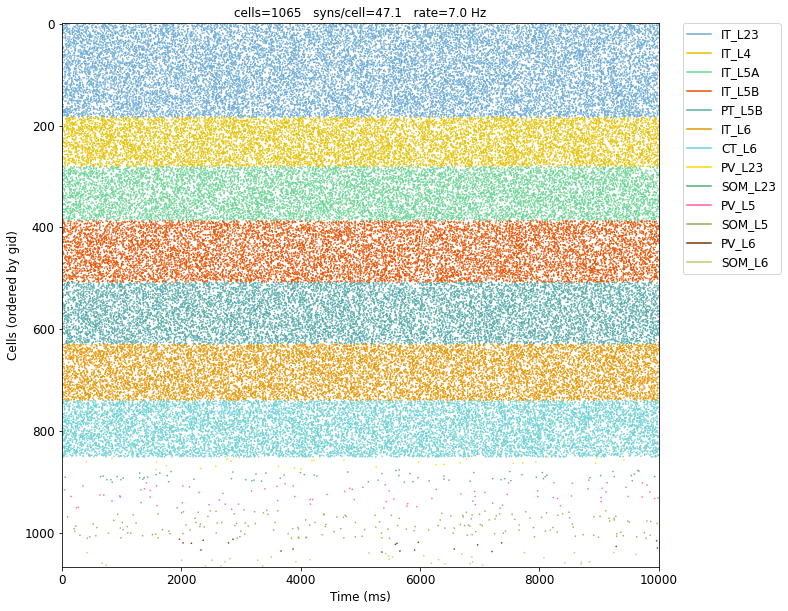

Plotting recorded cell traces ... cell


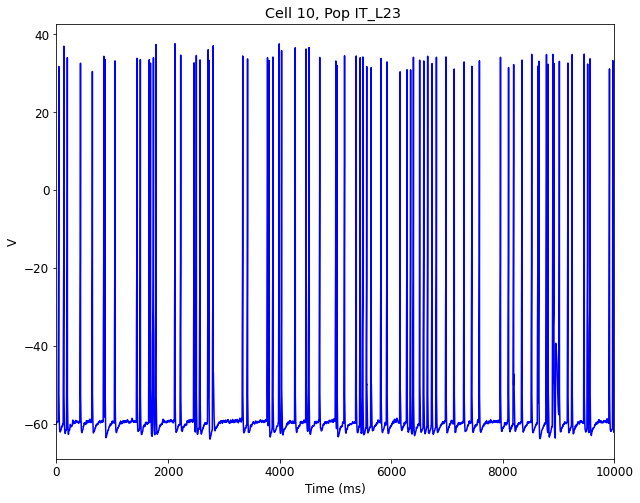

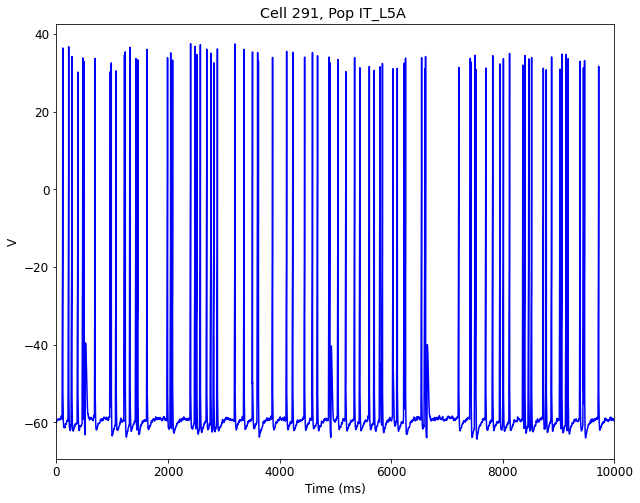

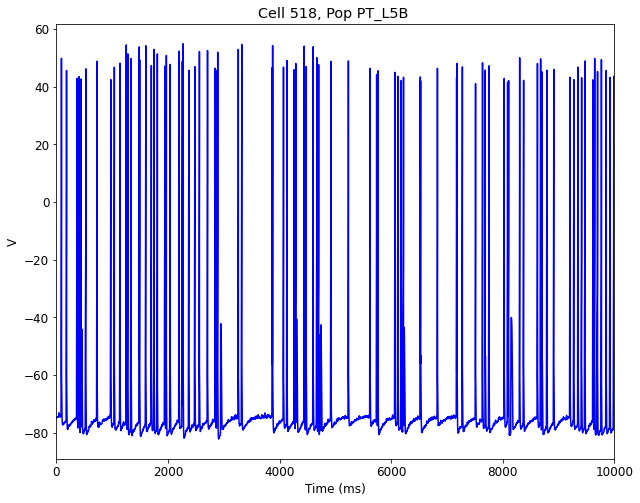

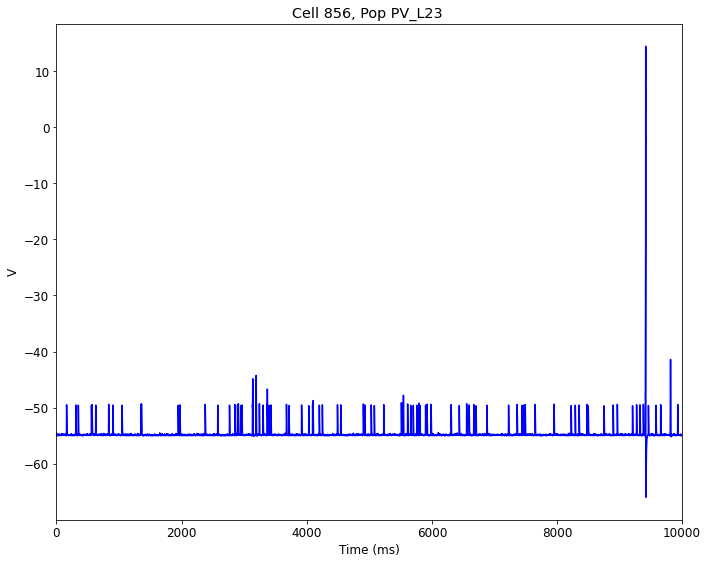

Plotting 2D representation of network cell locations and connections...


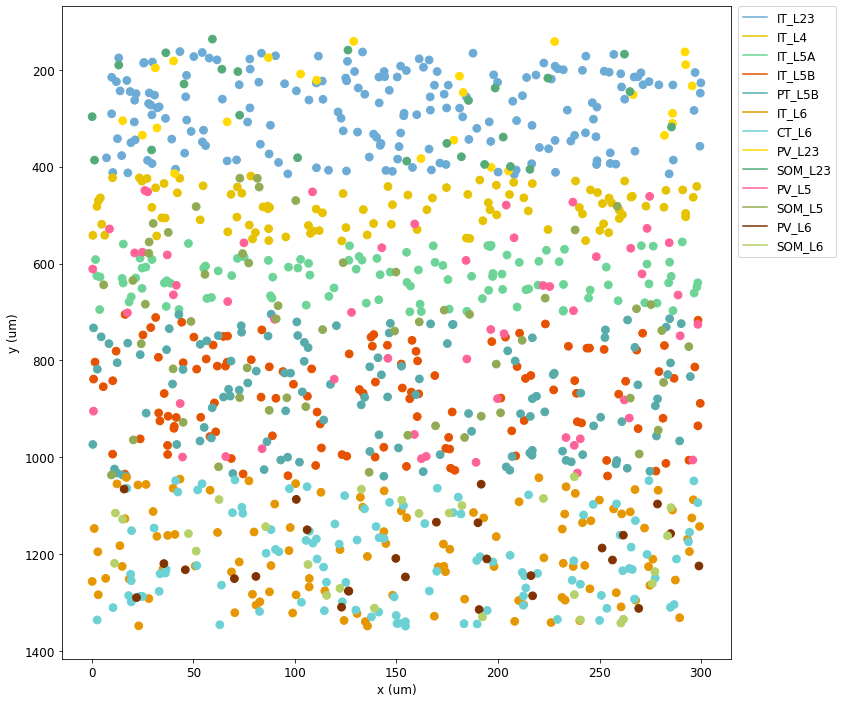

  Done; plotting time = 7.18 s

Total time = 595.62 s

End time:  2021-05-25 17:21:33.610613


In [15]:
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

Plotting 3D cell shape ...


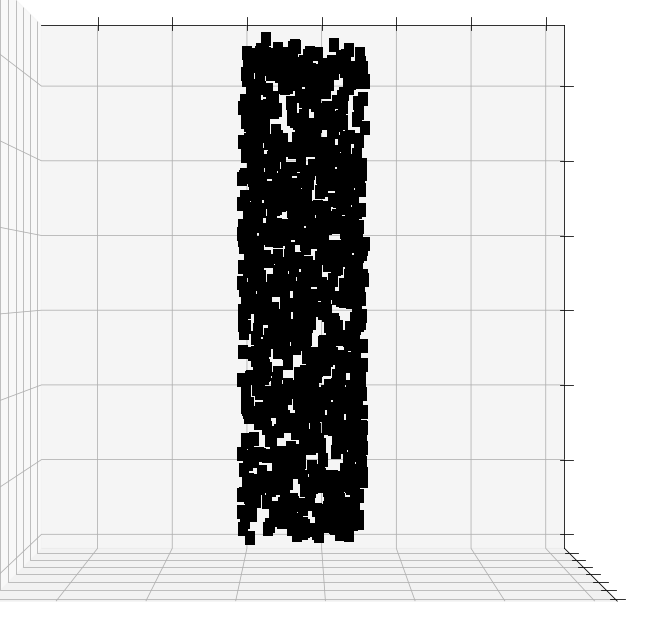

(<Figure size 720x576 with 1 Axes>, {})

In [16]:
sim.analysis.plotShape(includePre = [], includePost=['PV_L5'], showSyns=False, figSize=(4,9), dist=0.8, saveFig=False)